# Etapa 1: Importação das Bibliotecas



In [1]:
%pip -q install requests ipympl ipython ipywidgets matplotlib numpy scipy

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from math import floor, sqrt
from numpy import cos, sin, pi, absolute, array, arange, size, append, concatenate
from pylab import subplots, figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show, legend
from scipy.signal import firwin, lfilter
from scipy.linalg import pinvh as inv

# Etapa 2: Codigo de Exemplo

Text(0, 0.5, 'Amplitude')

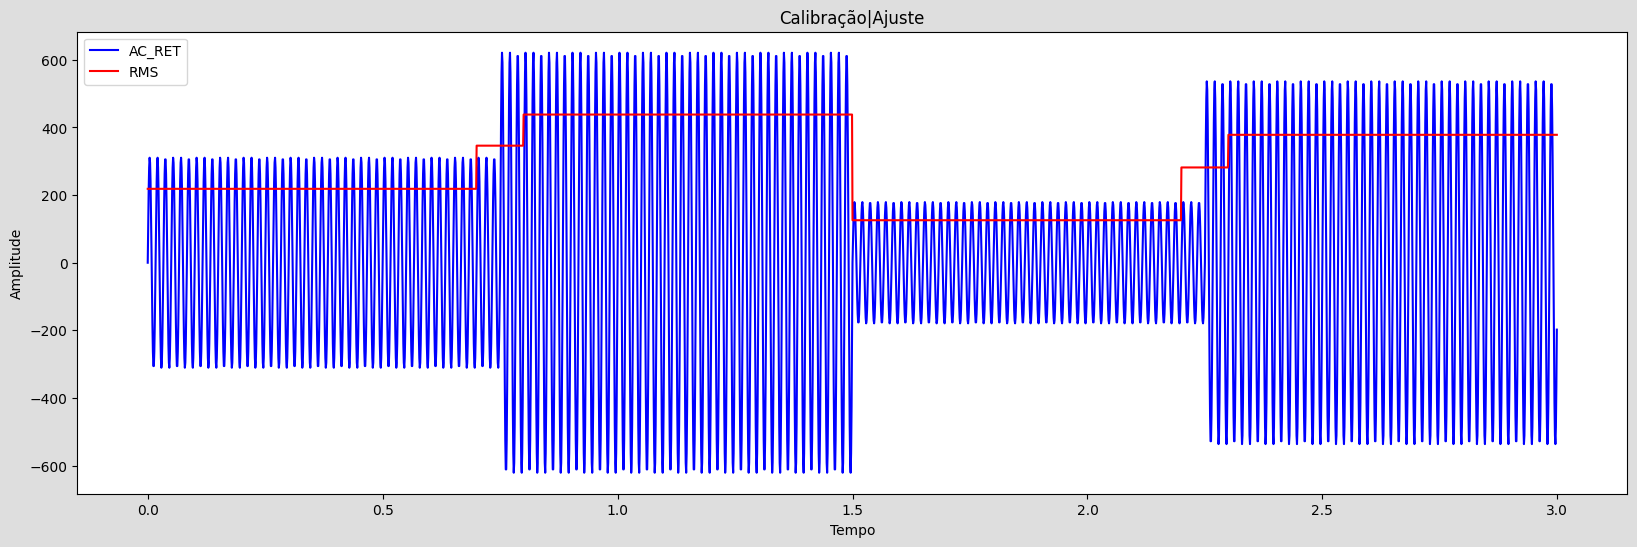

In [4]:
def adc_2_rms(vetor):
  rms = np.std(vetor,ddof=1);
  return rms*np.ones(np.size(vetor));

def MMQ(y, mx):
  coef = (inv(mx.T @ mx)) @ (mx.T @ y) # Faz a linearização com os dados
  return (coef)

# Dados do Sinal
GridFreq = 60 #Nominal Grid Frequency in Hz
Fs       = 1000 #Sampling frequency = 1Khz
Tfinal   = 3 #Time the simulation

# Variaveis calculadas
Ts       = 1/Fs #Sampling Time = 1/Fs
t        = arange(0,Tfinal,Ts) #Simulation Time vector
w        = 2*pi*GridFreq #Frequencia Angular

# constantes e projeto
step = 100
tamanho = floor(size(t)/4)

# Gera pontos como se estivesse lendo tensões alternadas.
supplyVoltage,rmsVoltage,y = np.array([]),np.array([]),np.array([])
for n in range(0,size(t)):
  match(n // tamanho):
   case 0: rms = 220 #Pontos de 311.12
   case 1: rms = 440 #Pontos de 622.25
   case 2: rms = 127 #Pontos de 179.60
   case _: rms = 380 #Pontos de 537.40
  supplyVoltage = append(supplyVoltage, rms*sqrt(2)*sin(w*(n*Ts)))

  y = append(y, rms)

  if(size(supplyVoltage) % step)==0 or size(supplyVoltage) == size(t):
    rmsVoltage = append(rmsVoltage,adc_2_rms(supplyVoltage[-1*step:]))

y = np.asmatrix(y)
x = np.asmatrix(rmsVoltage)

tam = np.size(x.T,0) # Quantidade de valores analisados
mx = np.concatenate((x.T, np.ones((tam,1))),1)
VCAL_M, VCAL_B = MMQ(y.T,mx)  # Faz o ajuste a partir de uma calibração.
V_RATIO = VCAL_M*rmsVoltage+VCAL_B;

fig, ax = subplots(figsize=(20,6), facecolor='#DEDEDE')
title("Calibração|Ajuste");
line1,line2 = ax.plot(t,supplyVoltage,'b',t,V_RATIO.T,'r') #linewidth=3
legend([line1,line2],["AC_RET","RMS"]);
xlabel('Tempo')
ylabel('Amplitude')

# Etapa 3: Insira mais uma faixa de 660 Volts na simulação

Text(0, 0.5, 'Amplitude')

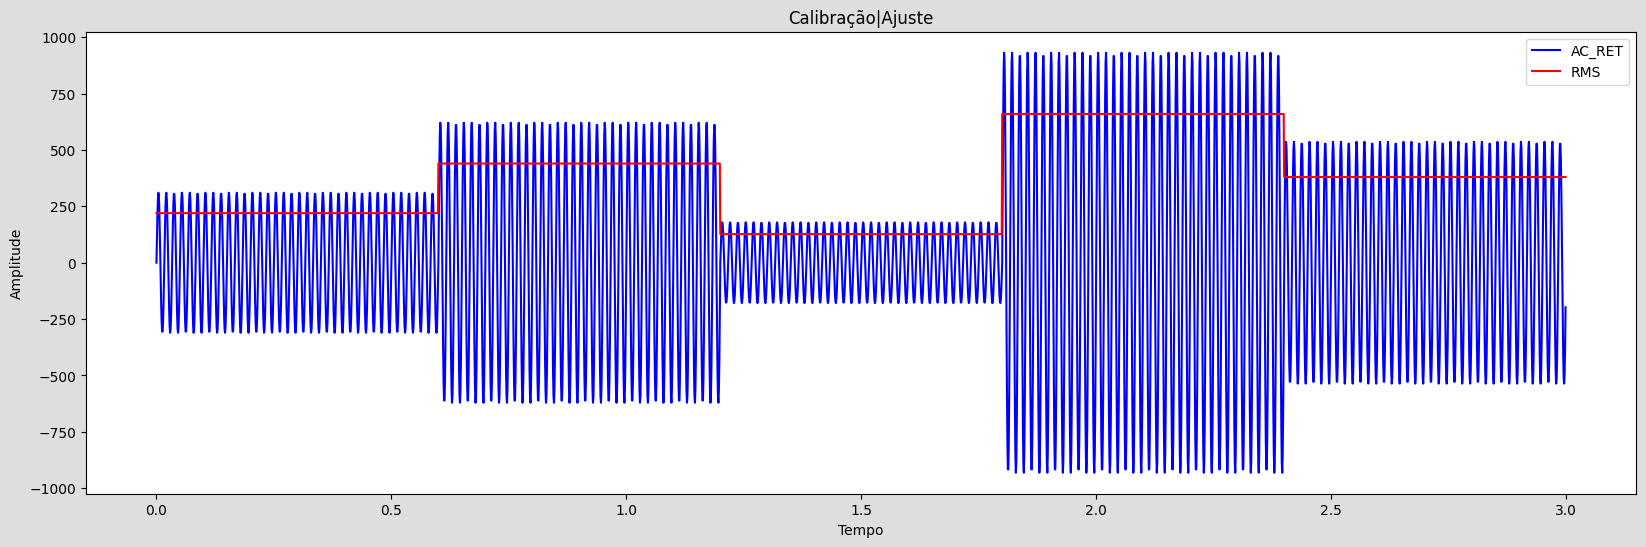

In [6]:
def adc_2_rms(vetor):
  rms = np.std(vetor,ddof=1);
  return rms*np.ones(np.size(vetor));

def MMQ(y, mx):
  coef = (inv(mx.T @ mx)) @ (mx.T @ y) # Faz a linearização com os dados
  return (coef)

# Dados do Sinal
GridFreq = 60 #Nominal Grid Frequency in Hz
Fs       = 1000 #Sampling frequency = 1Khz
Tfinal   = 3 #Time the simulation

# Variaveis calculadas
Ts       = 1/Fs #Sampling Time = 1/Fs
t        = arange(0,Tfinal,Ts) #Simulation Time vector
w        = 2*pi*GridFreq #Frequencia Angular

# constantes e projeto
step = 100
tamanho = floor(size(t)/5)

# Gera pontos como se estivesse lendo tensões alternadas.
supplyVoltage,rmsVoltage,y = np.array([]),np.array([]),np.array([])
for n in range(0,size(t)):
  match(n // tamanho):
   case 0: rms = 220 #Pontos de 311.12
   case 1: rms = 440 #Pontos de 622.25
   case 2: rms = 127 #Pontos de 179.60
   case 3: rms = 660 
   case _: rms = 380 #Pontos de 537.40
  supplyVoltage = append(supplyVoltage, rms*sqrt(2)*sin(w*(n*Ts)))

  y = append(y, rms)

  if(size(supplyVoltage) % step)==0 or size(supplyVoltage) == size(t):
    rmsVoltage = append(rmsVoltage,adc_2_rms(supplyVoltage[-1*step:]))

y = np.asmatrix(y)
x = np.asmatrix(rmsVoltage)

tam = np.size(x.T,0) # Quantidade de valores analisados
mx = np.concatenate((x.T, np.ones((tam,1))),1)
VCAL_M, VCAL_B = MMQ(y.T,mx)  # Faz o ajuste a partir de uma calibração.
V_RATIO = VCAL_M*rmsVoltage+VCAL_B;

fig, ax = subplots(figsize=(20,6), facecolor='#DEDEDE')
title("Calibração|Ajuste");
line1,line2 = ax.plot(t,supplyVoltage,'b',t,V_RATIO.T,'r') #linewidth=3
legend([line1,line2],["AC_RET","RMS"]);
xlabel('Tempo')
ylabel('Amplitude')